In [1]:
import pickle
import pandas as pd

X_test = pickle.load(open("X_test.pkl", "rb"))
y_test = pickle.load(open("y_test.pkl", "rb"))
model = pickle.load(open("ridge_model.pkl", "rb"))

y_pred = model.predict(X_test)



C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


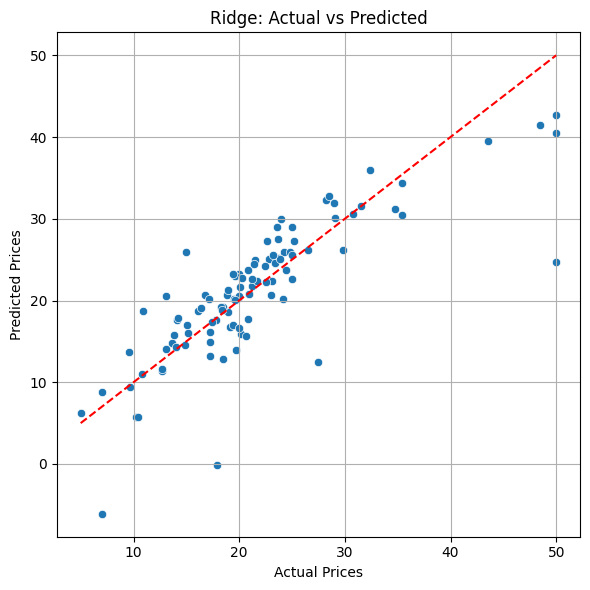

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


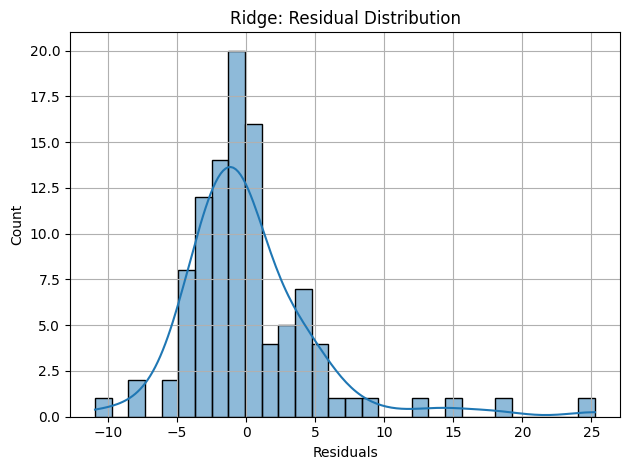

In [3]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Ridge: Residual Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


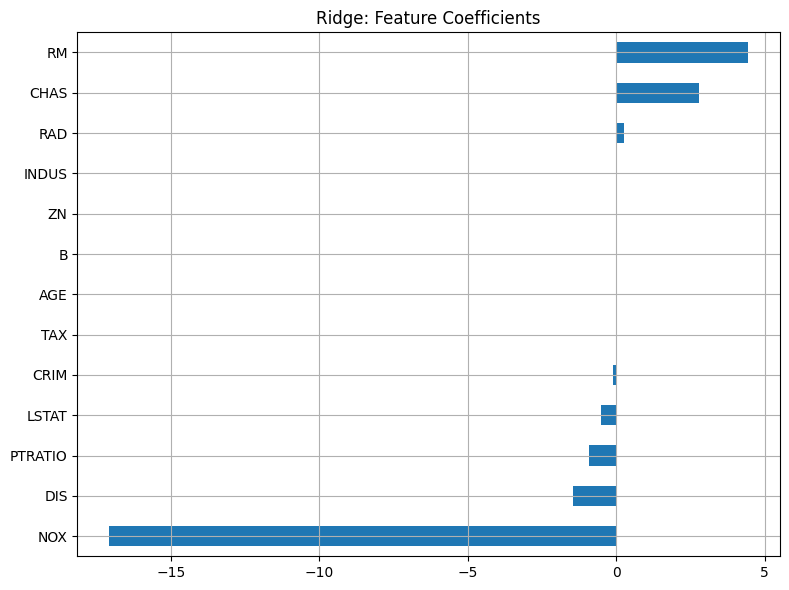

In [4]:
coefs = pd.Series(model.coef_, index=X_test.columns)
coefs.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Ridge: Feature Coefficients")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 4.93
R²: 0.67
